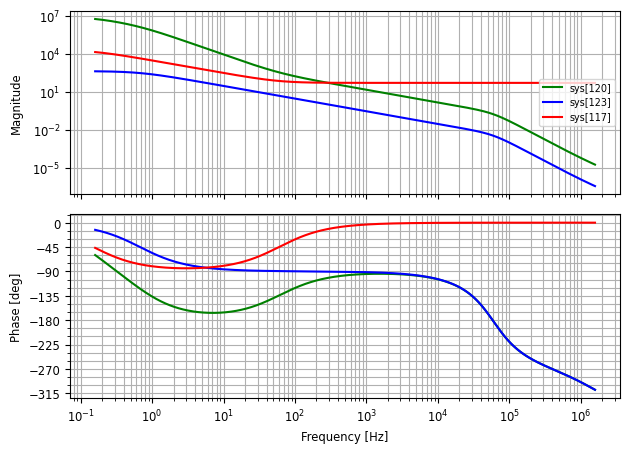

In [7]:
import control as co
import numpy as np

V_IN, V_OUT = 7.4, 170
N_PS = 1 / 10
D = N_PS * V_OUT / (V_IN + N_PS * V_OUT)
D_PRIME = 1 - D
L = 10e-6
R_LOAD, C_OUT = 17e+3 * 5, 4.7e-6
V_REF = 1.
f_SW = 120e+3
T_SW = 1 / f_SW
R_FB1 = 1000e+3
R_FB2 = R_FB1 * V_REF / (V_OUT - V_REF)

R_s = 0.003
V_SL = 40e-3
S_n, S_f, S_e = V_IN / L, N_PS * V_OUT / L, V_SL * f_SW / R_s

g_m = 2e-3
R_ea_o = 10e+6
G_comp = 0.142
A_ea_vol = g_m * R_ea_o
f_p2, f_z3 = 1.5 / 1 * 0.1, 600 * 1 * 0.1

R_c1 = f_p2 / (f_z3 - f_p2) * R_ea_o
C_c1 = 1 / (R_c1 * 2 * np.pi * f_z3)
A_ea = A_ea_vol

A_M = G_comp * N_PS * R_LOAD * D_PRIME / ((1 + D) * R_s)
w_z_rhp = (N_PS ** 2) * R_LOAD * (D_PRIME ** 2) / (L * D)
w_p_lf = (1 + D) / (C_OUT * R_LOAD)
w_n = np.pi * f_SW
Q = 1 / (np.pi * (D_PRIME * (1 + S_e / S_n) - 1 / 2))
G_co = A_M * co.tf([-1 / w_z_rhp, 1], [1]) / (co.tf([1 / w_p_lf, 1], [1]) * co.tf([(1 / w_n) ** 2, 1 / (w_n * Q), 1], [1]))

G_div = R_FB2 / (R_FB1 + R_FB2)
G_fb = A_ea * co.tf([1 / (2 * np.pi * f_z3), 1], [1 / (2 * np.pi * f_p2), 1])
G_overall_loop = G_co * G_div * G_fb

co.bode(G_overall_loop, np.logspace(0, 7, 1000), Hz=True, color='green')
co.bode(G_co * G_div, np.logspace(0, 7, 1000), Hz=True, color='blue')
co.bode(G_fb, np.logspace(0, 7, 1000), Hz=True, color='red')


In [7]:
print(1 / (2 * np.pi * R_c1 * C_c1))
print(1 / (2 * np.pi * (R_ea_o + R_c1) * C_c1))

60.0
0.15


In [28]:
(N_PS ** 2) * R_LOAD * (D_PRIME ** 2) / (L * D)

1496174.8633879784

In [31]:
print(w_z_rhp / (2 * np.pi))

238123.625238038


In [8]:
R_LOAD_dcm = 2 * L / (T_SW * N_PS ** 2 * D_PRIME ** 2)

print(R_LOAD_dcm)

2609.3206720233743


In [9]:
f_CROSS = f_SW / 10
f_cross = R_LOAD * (D_PRIME ** 2) / (5 * 2 * np.pi * L)

print(f_CROSS, f_cross)

12000.0 24885870.670368716


In [10]:
print(D)


0.6967213114754098


In [11]:
print(R_FB2 / (R_FB1 + R_FB2) * V_OUT)


1.0000000000000002


In [12]:
print(R_FB1, R_FB2)


1000000.0 5917.15976331361


In [13]:
print(S_n, S_f, S_e)
print((S_f - S_e) / (S_n + S_e))


224426.2295081967 1699999.9999999998 1600000.0
0.054811753077545024


In [14]:
R_FA = 2.21 * 10 ** 10 / f_SW - 955

print(R_FA)


183211.66666666666


In [15]:
print(R_c1, C_c1)

25062.65664160401 1.058380371561104e-07


In [16]:
delta_i_p = V_IN / L * D * T_SW
delta_i_s = delta_i_p * N_PS
delta_v_o = V_OUT / (R_LOAD * C_OUT) * D * T_SW
i_L = V_OUT / (N_PS * D_PRIME * R_LOAD)

print(delta_i_p, delta_v_o, i_L)


4.296448087431695 0.0024706429484943615 0.06594594594594594


In [17]:
co.dcgain(G_inner_loop * G_ivo)


NameError: name 'G_inner_loop' is not defined

In [ ]:
I_SS = 10e-6
t_SS = 10e-3
C_SS = t_SS * I_SS / (1 - V_IN / V_OUT)

print(C_SS)

1.0455104551045511e-07
